> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

That the degrees of the nodes in a random network are all close to the average degree, while in real-world networks, the degrees of the nodes are often very different from each other.

> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

1. Subcritical regime: $\langle k \rangle < 1$
2. Critical point: $\langle k \rangle = 1$
3. Supercritical regime: $1 < \langle k \rangle < \ln N$
4. Connected regime: $\langle k \rangle > \ln N$

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

Because in random networks $C(k)$ is supposed to be independent of $k$.

In [2]:
import networkx as nx

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

# Calculate the average shortest path length for each graph
l1 = nx.average_shortest_path_length(G1)
l2 = nx.average_shortest_path_length(G2)
l3 = nx.average_shortest_path_length(G3)

print("Average shortest path length for G1: {}".format(l1))
print("Average shortest path length for G2: {}".format(l2))
print("Average shortest path length for G3: {}".format(l3))

Average shortest path length for G1: 62.875751503006015
Average shortest path length for G2: 8.458573146292585
Average shortest path length for G3: 4.760432865731463


In [3]:
import numpy as np

p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

avg_d_list = []
std_dev_list = []

for p in p_list:
    avg_d = []
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        avg_d.append(nx.average_shortest_path_length(G))
    
    avg_d_list.append(sum(avg_d) / len(avg_d))
    std_dev_list.append(np.std(avg_d))

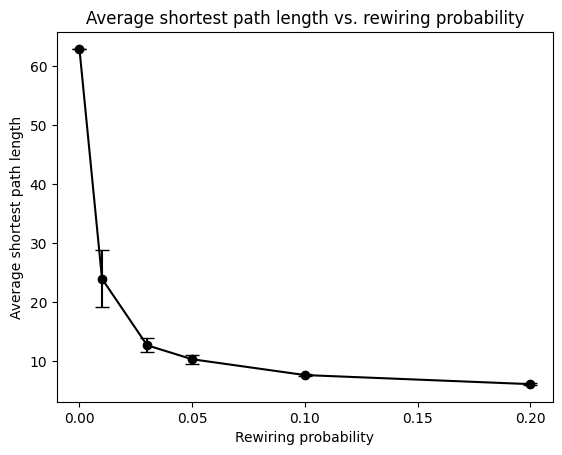

In [16]:
import matplotlib.pyplot as plt

# plot the average shortest path length vs. rewiring probability with error bars and black markers and connecting lines
plt.errorbar(p_list, avg_d_list, yerr=std_dev_list, fmt='o', color='black', linestyle='-', capsize=5)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.xlabel('Rewiring probability')
plt.ylabel('Average shortest path length')
plt.title('Average shortest path length vs. rewiring probability')
# make nodes black
plt.gca().set_prop_cycle(None)
plt.show()

The figure above shows the average shortest path length in Watts-Strogatz networks as a function of the rewiring probability $p$. The average shortest path length decreases as $p$ increases, which is expected since the network becomes more random and the average degree increases. The graph also shows the standard deviation of the shortest path lengths for each value of $p$. The standard deviation is highest for $p=0.01$, which is caused by the fact that the network only has a few random connections, which makes the shortest path lengths vary a lot. As $p$ increases, the standard deviation decreases, which is expected since the network becomes more random and the shortest path lengths become more similar.